# FSL Segmented Notebook

## Import Important Modules & Libraries

In [2]:
import pandas as pd
import numpy as np
import nibabel as nib

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


## Data Processing & Volume Calculations

**CODE USED TO CLEAN FILE NAMES**

In [ ]:
import os
import re

def rename_files(directory):
    pattern = r'IXI(\d+)-Guys-\d+-T1.nii_seg_pve_2.nii.gz'
    for filename in os.listdir(directory):
        match = re.match(pattern, filename)
        if match:
            new_filename = f"IXI{int(match.group(1)):03}.nii_seg_pve_2.nii.gz"
            old_path = os.path.join(directory, filename)
            new_path = os.path.join(directory, new_filename)
            os.rename(old_path, new_path)

if __name__ == "__main__":
    # Replace 'path_to_directory' with the actual path to the directory containing the files
    path_to_directory = "PVE/2"
    rename_files(path_to_directory)


**WHITE MATTER VOLUME CALCULATIONS**

In [31]:
import os
import numpy as np
import nibabel as nib
import csv

# Replace 'path_to_data_directory' with the actual path to the directory containing the PVE files for White Matter
data_directory = 'PVE/0'

# Get a list of all files in the 'PVE' folder
all_files = os.listdir(data_directory)

# Filter the list to include only the PVE files for White Matter (assuming they follow the naming convention)
subject_list = [filename.replace('.nii_seg_pve_0.nii.gz', '') for filename in all_files if filename.endswith('.nii_seg_pve_0.nii.gz')]

# Function to extract the numeric part from the subject ID
def extract_numeric_id(subject_id):
    return int(''.join(filter(str.isdigit, subject_id)))

# Initialize a list to store White Matter volumetric measurements for each subject
wm_volumes = []

for subject in subject_list:
    pve_file_wm = os.path.join(data_directory, f'{subject}.nii_seg_pve_0.nii.gz')

    # Load the White Matter PVE file using nibabel
    pve_data_wm = nib.load(pve_file_wm).get_fdata()

    # Calculate the White Matter voxel volume
    wm_volume = np.sum(pve_data_wm)

    # Append the White Matter volume to the list
    wm_volumes.append(wm_volume)

# Now you have a list containing the White Matter volumetric measurements for each subject
print("White Matter Volumes:", wm_volumes)

# Read the contents of the CSV file into a list of dictionaries
csv_file_path = 'IXI-FSL.csv'
csv_data = []
with open(csv_file_path, 'r') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        csv_data.append(row)

# Add the White Matter volumes to the corresponding rows in the CSV data
for i, subject_id in enumerate(subject_list):
    numeric_subject_id = extract_numeric_id(subject_id)
    # Find the corresponding row in the CSV data using 'IXI_ID'
    for row in csv_data:
        if 'IXI_ID' in row and int(row['IXI_ID']) == numeric_subject_id:
            # Update the 'WM_VOLUME' column with the calculated White Matter volume
            row['WM_VOLUME'] = wm_volumes[i]
            break

# Write the updated CSV data back to the file
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = list(csv_data[0].keys())
    if 'WM_VOLUME' not in fieldnames:
        fieldnames.append('WM_VOLUME')
    csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    csv_writer.writeheader()
    csv_writer.writerows(csv_data)

print("White Matter volumes added to the CSV file.")


White Matter Volumes: [323004.43944183365, 264740.9966603946, 322366.92147007585, 396982.9416136835, 268905.33532661013, 270629.0857895985, 284703.71946287714, 300985.1932976339, 241699.33337894827, 220054.55265015736, 240418.63885390759, 211051.03752386197, 244640.50679739378, 358154.74943882227, 327223.13949123956, 249526.8652724661, 384138.4071143996, 208242.2254050281, 239529.34791004285, 187587.71706814505, 300747.5280597098, 309514.6605096441, 271721.84602575935, 607989.985361129, 296638.72549771704, 289835.9838269558, 320034.61122230627, 249446.04688472487, 255512.71744181216, 300061.28529770486, 297729.20648719184, 259944.21098769084, 299365.509457916, 573008.1923517678, 205630.00102553144, 632505.9316720217, 270224.16830275767, 298613.7035363801, 338993.21345776133, 281066.85293644853, 267396.82703130506, 237252.81744554825, 253215.4045441337, 221216.41510756686, 320924.11641480215, 354025.71034503914, 294237.0040827673, 299612.51537875086, 348406.43644468114, 277362.068987973

**GRAY MATTER VOLUME CALCULATIONS**

In [26]:
import os
import numpy as np
import nibabel as nib
import csv

# Replace 'path_to_data_directory' with the actual path to the directory containing the PVE files for Gray Matter
data_directory = 'PVE/1'

# Get a list of all files in the 'PVE' folder
all_files = os.listdir(data_directory)

# Filter the list to include only the PVE files for Gray Matter (assuming they follow the naming convention)
subject_list = [filename.replace('.nii_seg_pve_1.nii.gz', '') for filename in all_files if filename.endswith('.nii_seg_pve_1.nii.gz')]

# Function to extract the numeric part from the subject ID
def extract_numeric_id(subject_id):
    return int(''.join(filter(str.isdigit, subject_id)))

# Initialize a list to store Gray Matter volumetric measurements for each subject
gm_volumes = []

for subject in subject_list:
    pve_file_gm = os.path.join(data_directory, f'{subject}.nii_seg_pve_1.nii.gz')

    # Load the Gray Matter PVE file using nibabel
    pve_data_gm = nib.load(pve_file_gm).get_fdata()

    # Calculate the Gray Matter voxel volume
    gm_volume = np.sum(pve_data_gm)

    # Append the Gray Matter volume to the list
    gm_volumes.append(gm_volume)

# Now you have a list containing the Gray Matter volumetric measurements for each subject
print("Gray Matter Volumes:", gm_volumes)

# Read the contents of the CSV file into a list of dictionaries
csv_file_path = 'IXI-FSL.csv'
csv_data = []
with open(csv_file_path, 'r') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        csv_data.append(row)

# Add the Gray Matter volumes to the corresponding rows in the CSV data
for i, subject_id in enumerate(subject_list):
    numeric_subject_id = extract_numeric_id(subject_id)
    # Find the corresponding row in the CSV data using 'IXI_ID'
    for row in csv_data:
        if 'IXI_ID' in row and int(row['IXI_ID']) == numeric_subject_id:
            # Update the 'GM_VOLUME' column with the calculated Gray Matter volume
            row['GM_VOLUME'] = gm_volumes[i]
            break

# Write the updated CSV data back to the file
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = list(csv_data[0].keys())
    if 'GM_VOLUME' not in fieldnames:
        fieldnames.append('GM_VOLUME')
    csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    csv_writer.writeheader()
    csv_writer.writerows(csv_data)

print("Gray Matter volumes added to the CSV file.")


Gray Matter Volumes: [529574.7794326823, 527686.0696881283, 655698.1112471726, 566193.5005152375, 496528.6262407396, 523765.6432952285, 643759.7909585033, 454494.42988156714, 532695.9905210603, 586250.5522415619, 588715.8943143114, 474469.2474443633, 545222.3246705588, 610445.9175543208, 524674.1216589585, 496300.06296655536, 581230.2386703808, 564648.2892194428, 487973.8359054681, 636955.6522610206, 533699.6834159531, 608686.0523773301, 656434.9566611946, 490394.008158043, 432936.746457845, 484395.75099751167, 592707.3722750191, 560171.7049097214, 566976.4056284502, 499370.74440712854, 631631.2340033632, 544745.7976257671, 506545.89445286803, 535817.2808288205, 638343.1772014052, 501605.0176844299, 549968.4765775651, 568850.8086464945, 725685.9135584123, 508707.26558686607, 491119.0580656044, 475994.3400131725, 608864.0850530509, 473221.1614765208, 538663.2812941466, 539572.5097743105, 540534.1760605369, 619951.8957455028, 560770.1291613169, 595443.6112375334, 541187.7299219817, 53778

**CSF VOLUME**

In [30]:
import os
import numpy as np
import nibabel as nib
import csv

# Replace 'path_to_data_directory' with the actual path to the directory containing the PVE files for CSF
data_directory = 'PVE/2'

# Get a list of all files in the 'PVE' folder
all_files = os.listdir(data_directory)

# Filter the list to include only the PVE files for CSF (assuming they follow the naming convention)
subject_list = [filename.replace('.nii_seg_pve_2.nii.gz', '') for filename in all_files if filename.endswith('.nii_seg_pve_2.nii.gz')]

# Function to extract the numeric part from the subject ID
def extract_numeric_id(subject_id):
    return int(''.join(filter(str.isdigit, subject_id)))

# Initialize a list to store CSF volumetric measurements for each subject
csf_volumes = []

for subject in subject_list:
    pve_file_csf = os.path.join(data_directory, f'{subject}.nii_seg_pve_2.nii.gz')

    # Load the CSF PVE file using nibabel
    pve_data_csf = nib.load(pve_file_csf).get_fdata()

    # Calculate the CSF voxel volume
    csf_volume = np.sum(pve_data_csf)

    # Append the CSF volume to the list
    csf_volumes.append(csf_volume)

# Now you have a list containing the CSF volumetric measurements for each subject
print("CSF Volumes:", csf_volumes)

# Read the contents of the CSV file into a list of dictionaries
csv_file_path = 'IXI-FSL.csv'
csv_data = []
with open(csv_file_path, 'r') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        csv_data.append(row)

# Add the CSF volumes to the corresponding rows in the CSV data
for i, subject_id in enumerate(subject_list):
    numeric_subject_id = extract_numeric_id(subject_id)
    # Find the corresponding row in the CSV data using 'IXI_ID'
    for row in csv_data:
        if 'IXI_ID' in row and int(row['IXI_ID']) == numeric_subject_id:
            # Update the 'CSF_VOLUME' column with the calculated CSF volume
            row['CSF_VOLUME'] = csf_volumes[i]
            break

# Write the updated CSV data back to the file
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = list(csv_data[0].keys())
    if 'CSF_VOLUME' not in fieldnames:
        fieldnames.append('CSF_VOLUME')
    csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    csv_writer.writeheader()
    csv_writer.writerows(csv_data)

print("CSF volumes added to the CSV file.")


CSF Volumes: [564146.9229717851, 524580.2980867028, 501578.97944897413, 587002.9338245392, 453125.0303210616, 460556.8577337265, 625946.3680967093, 502438.65798175335, 492637.9710929394, 403258.5709065795, 469494.57302701473, 507545.33871370554, 590563.0431694984, 474019.2299503088, 543935.2907577157, 546947.9626188874, 587172.4996377826, 437293.0986940861, 524163.4975901842, 470051.99500095844, 388394.3765922189, 637517.8529148102, 585903.5552837253, 568025.3442151546, 431635.9251412749, 392390.40692555904, 479266.6363130212, 507265.01447737217, 476046.39539545774, 511196.4006742239, 816637.6553648114, 392371.34506750107, 533092.406006813, 542409.0915246606, 581353.807878077, 514874.13412874937, 587781.7115305066, 486238.0771650672, 463662.8054289818, 543406.0486328602, 448626.13833361864, 480313.2062290311, 468847.5603388548, 468758.1194817424, 472444.0244333148, 506461.2704023719, 520921.63118863106, 478886.00364267826, 459709.12498027086, 465082.2601752877, 495972.24880462885, 6026

**After calculating the volumes for the subjects, i removed the rows that had nan or incomplete values**

In [35]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('IXI-FSL.csv')

# Drop the rows where AGE is NaN
df = df.dropna(subset=['AGE'])

# Write DataFrame back to CSV
df.to_csv('IXI-FSL-Cleaned.csv', index=False)



In [36]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('your_file.csv')

# Drop the rows where WM_VOLUME is NaN
df = df.dropna(subset=['WM_VOLUME'])

# Write DataFrame back to CSV
df.to_csv('IXI-FSL-Cleaned.csv', index=False)


## Basic Statiscs and EDA Analysis

In [3]:

df = pd.read_csv('IXI-FSL-Cleaned.csv')
print(df.head(15))

    IXI_ID  SEX_ID (1=m, 2=f)  HEIGHT  WEIGHT  ETHNIC_ID  MARITAL_ID   
0        2                  2     164      58          1           4  \
1       12                  1     175      70          1           2   
2       13                  1     182      70          1           2   
3       14                  2     163      65          1           4   
4       15                  1     181      90          2           1   
5       16                  1     172      63          1           2   
6       17                  2     178      72          1           3   
7       19                  1     180      88          1           2   
8       20                  1     178      72          1           2   
9       21                  2     165      64          1           1   
10      22                  1     180      89          1           1   
11      23                  2     160      56          1           2   
12      24                  2     168      61          3        

In [38]:
import pandas as pd

# Load your data
df = pd.read_csv('IXI-FSL-Cleaned.csv')

# Compute summary statistics for the "AGE" column
mean_age = df['AGE'].mean()
median_age = df['AGE'].median()
mode_age = df['AGE'].mode()[0]
min_age = df['AGE'].min()
max_age = df['AGE'].max()
std_dev_age = df['AGE'].std()

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode of Age: {mode_age}")
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")
print(f"Age Standard Deviation: {std_dev_age}")


Mean Age: 48.65191829484902
Median Age: 48.68
Mode of Age: 53.41
Minimum Age: 19.98
Maximum Age: 86.32
Age Standard Deviation: 16.473045271378492


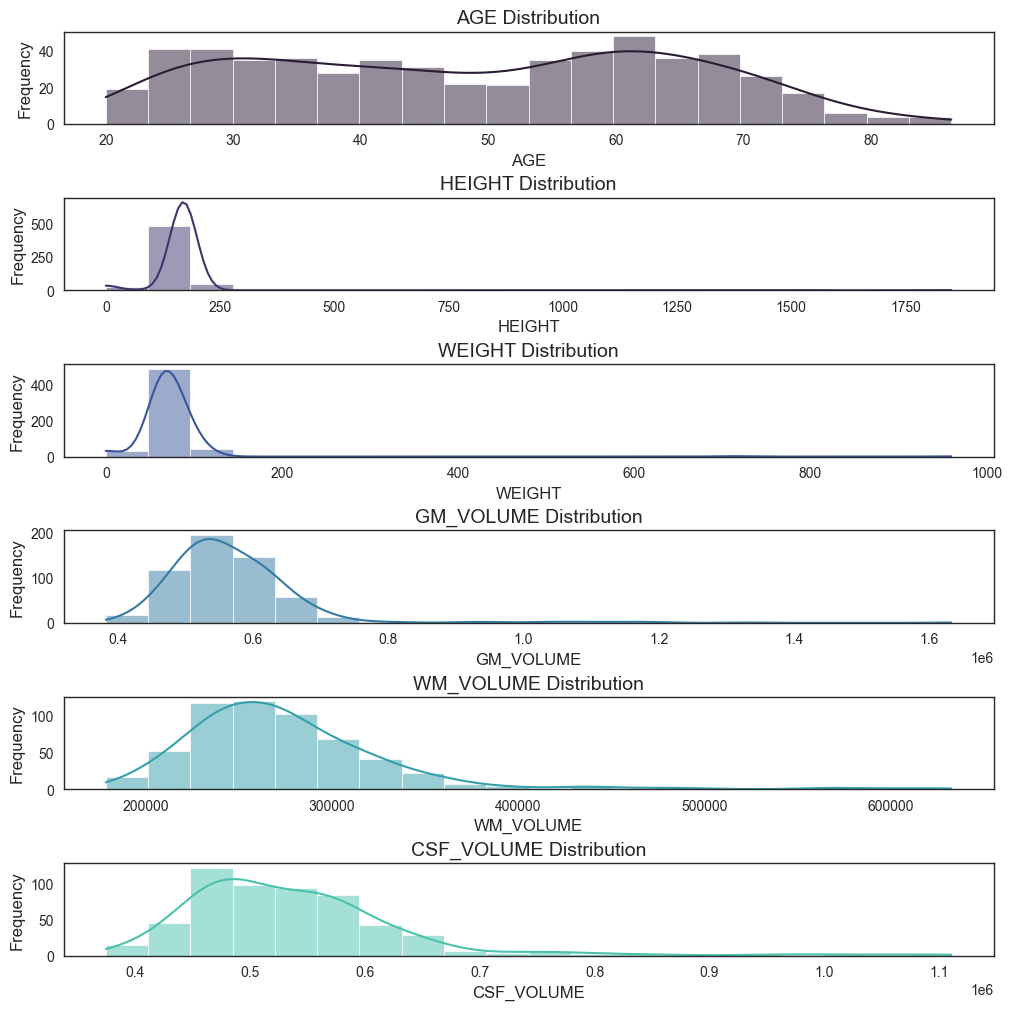

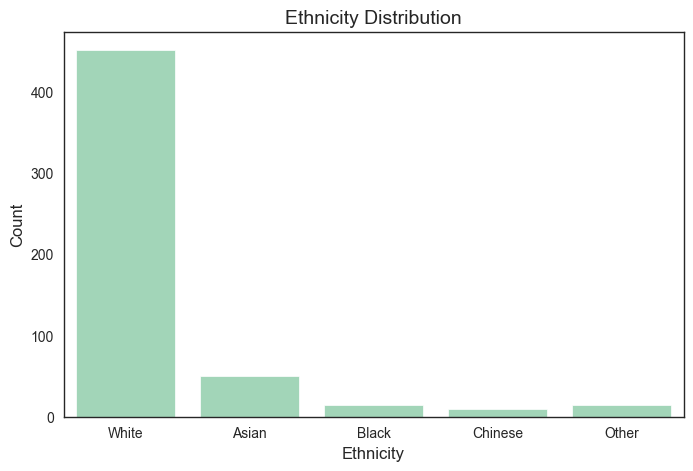

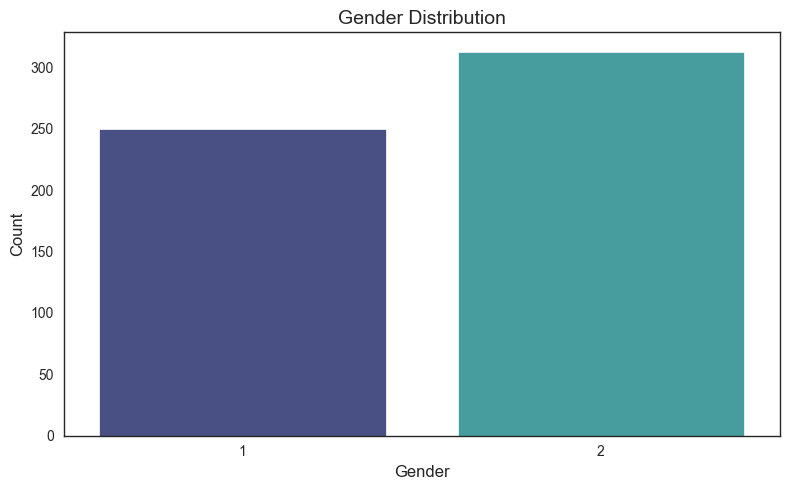

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv('IXI-FSL-Cleaned.csv')

# Set the background style to white (without gridlines)
sns.set_style("white")

# Create a palette dictionary to map colors to the variables
palette = {"AGE": sns.color_palette("mako", 7)[0], 
           "HEIGHT": sns.color_palette("mako", 7)[1],
           "WEIGHT": sns.color_palette("mako", 7)[2],
           "GM_VOLUME": sns.color_palette("mako", 7)[3],
           "WM_VOLUME": sns.color_palette("mako", 7)[4],
           "CSF_VOLUME": sns.color_palette("mako", 7)[5],
           "ETHNIC_ID": sns.color_palette("mako", 7)[6]}

# List of continuous variables to plot
cont_variables = ['AGE', 'HEIGHT', 'WEIGHT', 'GM_VOLUME', 'WM_VOLUME', 'CSF_VOLUME']

# Create histograms
plt.figure(figsize=(12, 2*(len(cont_variables))))  # One bar plot for each variable
for i, var in enumerate(cont_variables, 1):
    plt.subplot(len(cont_variables), 1, i)
    sns.histplot(df[var], bins=20, kde=True, color=palette[var])  
    plt.title(f'{var} Distribution', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Add some spacing between subplots
plt.subplots_adjust(hspace=0.8)

# Labels for ETHNIC_ID
ethnic_labels = {
    1: 'White',
    4: 'Black',
    3: 'Asian',
    6: 'Chinese',  
    5: 'Other'    
}

# Replace numeric IDs with ethnicity labels for plotting
df['ETHNIC_ID'] = df['ETHNIC_ID'].map(ethnic_labels)

# Bar plot for ETHNIC_ID
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ETHNIC_ID', palette=[palette['ETHNIC_ID']])
plt.title('Ethnicity Distribution', fontsize=14)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Bar plot for SEX_ID
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SEX_ID', palette=sns.color_palette("mako", 2))
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


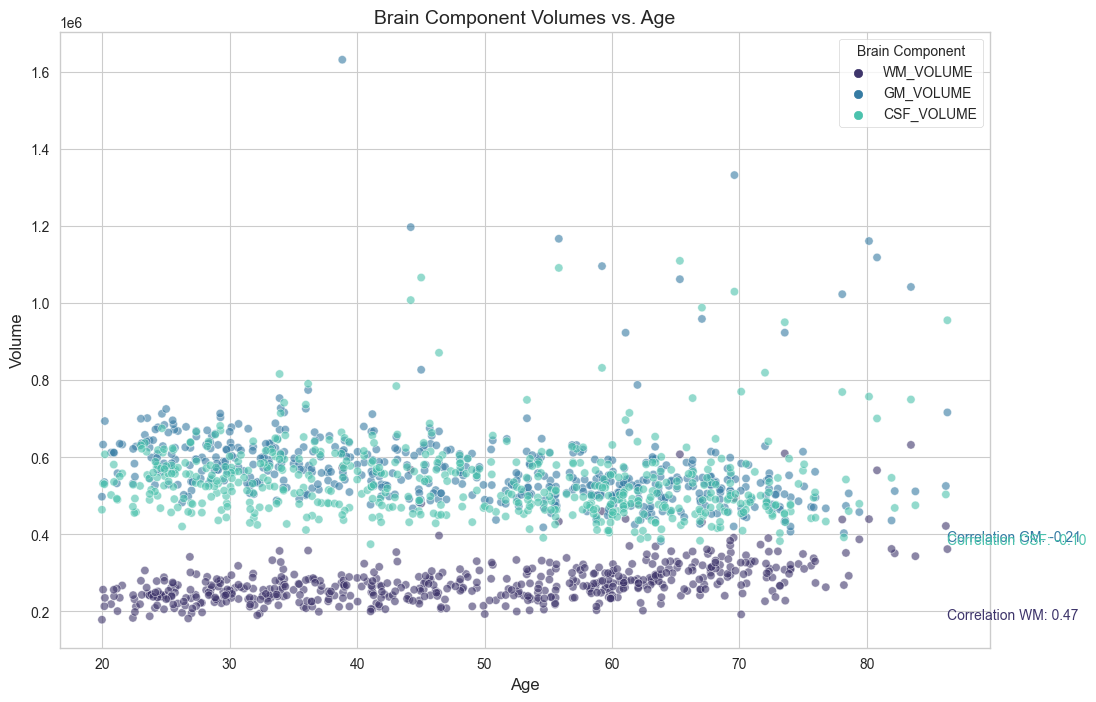

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv('IXI-FSL-Cleaned.csv')

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Melt the dataframe to a long format for easy plotting
df_melted = df.melt(id_vars='AGE', value_vars=['WM_VOLUME', 'GM_VOLUME', 'CSF_VOLUME'], 
                    var_name='Brain Component', value_name='Volume')

# Create a palette dictionary to map colors to the brain components
palette = {"WM_VOLUME": sns.color_palette("mako", 3)[0], 
           "GM_VOLUME": sns.color_palette("mako", 3)[1], 
           "CSF_VOLUME": sns.color_palette("mako", 3)[2]}

# Create a scatter plot
sns.scatterplot(data=df_melted, x='AGE', y='Volume', hue='Brain Component', palette=palette, ax=ax, alpha=0.6)

# Setting labels and title
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Volume', fontsize=12)
ax.set_title('Brain Component Volumes vs. Age', fontsize=14)

# Display the correlations on the graph
correlation_wm = df['AGE'].corr(df['WM_VOLUME'])
correlation_gm = df['AGE'].corr(df['GM_VOLUME'])
correlation_csf = df['AGE'].corr(df['CSF_VOLUME'])

ax.text(df['AGE'].max(), df['WM_VOLUME'].min(), f'Correlation WM: {correlation_wm:.2f}', color=palette["WM_VOLUME"], fontsize=10)
ax.text(df['AGE'].max(), df['GM_VOLUME'].min(), f'Correlation GM: {correlation_gm:.2f}', color=palette["GM_VOLUME"], fontsize=10)
ax.text(df['AGE'].max(), df['CSF_VOLUME'].min(), f'Correlation CSF: {correlation_csf:.2f}', color=palette["CSF_VOLUME"], fontsize=10)

plt.show()


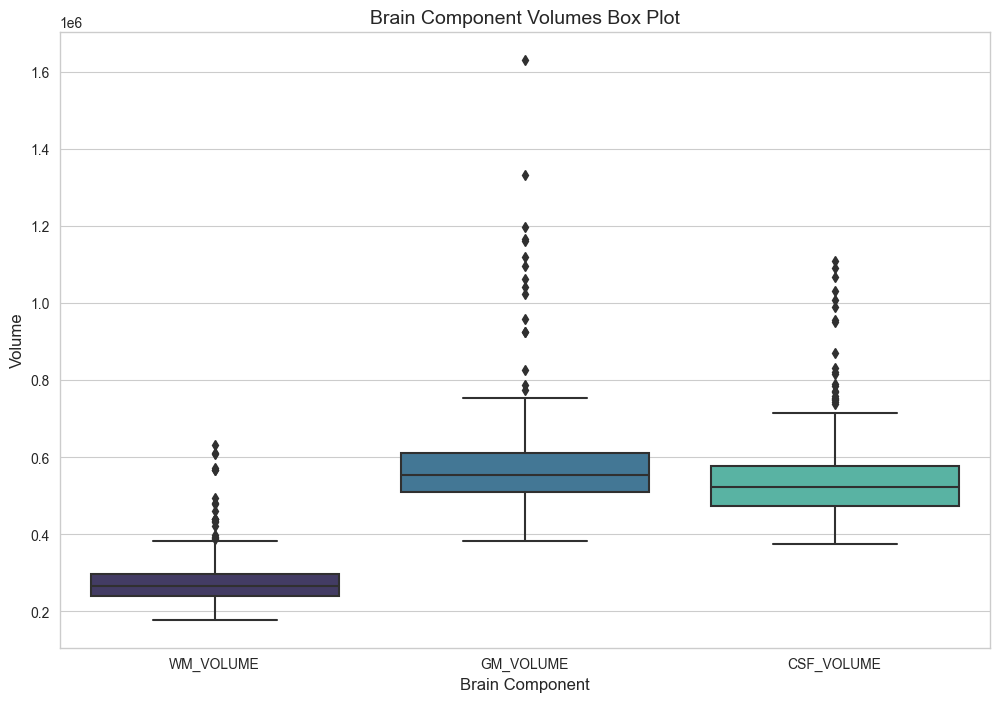

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv('IXI-FSL-Cleaned.csv')

# Set the background style to white with gridlines
sns.set_style("whitegrid")

# Melt the dataframe to a long format for easy plotting
df_melted = df.melt(value_vars=['WM_VOLUME', 'GM_VOLUME', 'CSF_VOLUME'], 
                    var_name='Brain Component', value_name='Volume')

# Create a palette dictionary to map colors to the brain components
palette = {"WM_VOLUME": sns.color_palette("mako", 3)[0], 
           "GM_VOLUME": sns.color_palette("mako", 3)[1], 
           "CSF_VOLUME": sns.color_palette("mako", 3)[2]}

# Create the box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x='Brain Component', y='Volume', palette=palette)

# Set labels and title
plt.xlabel('Brain Component', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.title('Brain Component Volumes Box Plot', fontsize=14)

plt.show()
